<a href="https://colab.research.google.com/github/haoming150ty/Personal-Portfolio/blob/main/Haoming_Zhang_Individual_Assignment_M4_BDM_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Individual Assignment M4: Linear regression using the SOCR Data MLB HeightsWeights dataset

-------------------------------------------------------------------------
* Haoming Zhang
* haz23017

## Problem statement

The first homework was based on the SOCR Data MLB HeightsWeights dataset. For your reference, the link is here:http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights . Remember that you had to clean this dataset to remove rows with NaN entries; you will have to do the same here!

In this exercise, your goal is to create a linear regression model that predicts **weight** based on **height** and **age**. Namely, given a height $H$ and an age $A$, you want to estimate the weight $W$ using the expression:

$W = a + b  \times H + c \times A$

Build a least-squares model to estimate the parameters $a, b$, and $c$, i.e., your solution should minimize the sum of squared differences between the model's predicted values and the observations. The expression of the objective function is

$\min   \sum\limits_{i \in |X|}(w_i - z_i)^2,$

where $w_i$ is the weight for the $i$-th input entry of the training set $X$ estimated by the linear regression model.

As training set $X$, you will use the **first 500 entries** of the SOCR Data MLB HeightsWeights dataset (**after deletion of the rows with NaN entries**). After finding the values of $a$, $b$, and $c$, you should use the **last 400 entries as test set** $Y$ ((again, **after deletion of the rows with NaN entries**)) to compute the mean absolute error (https://en.wikipedia.org/wiki/Mean_absolute_error). The MAE is computed as follows:

$\min  \frac{1}{|Y|} \sum\limits_{i \in |Y|} |w_i - z_i|$


What are the best values of the parameters $a, b,$ and $c$ for this criterion? What is the minimum value of the objective function? What is the MAE for the test set? Remember that this is a nonlinear optimization problem, so **you and your colleague may end up with different solutions!**



**Rubric:**

  *   Data extraction and preparation (**clean your data!!!**) (25 pts)
    * Deduction of 10 pts if rows with NaN entries are not removed
  *   Correct code and solution (50 pts)
    * Deduction of 10 pts if solution does not use the correct training set
  *   Test your solution (25 pts)
    * Deduction of 10 pts if solution does not use the correct test set


* Comments should be provided for all arguments. For this activity, your code should have **at least one original comment for every three lines of code** (**do not copy and paste comments from your colleagues!!!**). You will lose 25\% of the the points if the comment requirement is not met.
* **You should submit a notebook that can be downloaded and executed without adjustments (i.e., your notebook should work).** If your notebook does not satisfy these requirements, the grade of your assignment will be capped at 50 points.
* **Hunter's guidelines to properly check your file for running standalone without your cached history of variables**: In the top right corner see "RAM" and "Disk" with a dropdown arrow next to it. Click the arrow, then manage sessions. Terminate all sessions, you may get a warning, still choose to terminate. This disconnects from the notebook and flushes out the cache. Now click reconnect and then under runtime, "Run All". This should now either function or get stuck. If stuck, fix and repeat. If not, you're good! **Do that before submitting your notebook on HuskyCT!**


## Code used to import IPOPT

In [ ]:
# mounting the drive!
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline # setting up proper environment
from pylab import *

In [ ]:
# %% should always stay on the top of the cell!
%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'
from pyomo.environ import * # pyomo environment importing everything

# **Data Extraction and Preparation**

## Modules importing and data set reading

In [ ]:
# first things first: import the modules!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the data set using gdown
!gdown --id 1BdWmw5uE_4AKSZYxkXiYfYyia08SYfUM

# read the data set, put everything in a data frame and then view the data frame
myDf = pd.read_csv('UCLA_height_weight_data.csv')
myDf

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BdWmw5uE_4AKSZYxkXiYfYyia08SYfUM
To: /content/UCLA_height_weight_data.csv
100% 51.6k/51.6k [00:00<00:00, 66.4MB/s]


,Unnamed: 0,Name,Team,Position,Height(inches),Weight(pounds),Age
0,0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...,...
1029,1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [ ]:
myDf.info()
# use df.info() to get a high-level look at the data frame, we want to know if there is any NaN to be cleaned
# in line #5 Weight, we only have 1033 values while all others have 1034, which means there are multiple NaN values to be cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1034 non-null   int64  
 1   Name            1034 non-null   object 
 2   Team            1034 non-null   object 
 3   Position        1034 non-null   object 
 4   Height(inches)  1034 non-null   int64  
 5   Weight(pounds)  1033 non-null   float64
 6   Age             1034 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 56.7+ KB


## NaN values removal

In [ ]:
myDf = myDf.dropna() # use dropna function to erase NaN values and update the data frame with cleaned columns and rows
myDf.info() # check the information to see if all changes are saved

<class 'pandas.core.frame.DataFrame'>
Index: 1033 entries, 0 to 1033
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1033 non-null   int64  
 1   Name            1033 non-null   object 
 2   Team            1033 non-null   object 
 3   Position        1033 non-null   object 
 4   Height(inches)  1033 non-null   int64  
 5   Weight(pounds)  1033 non-null   float64
 6   Age             1033 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 64.6+ KB


## Data partition

In [ ]:
trainSet = myDf.iloc[:500] # Training set takes first 500 entries
testSet = myDf.iloc[-400:] # Test set takes the last 400 entries

trainSet.info(), testSet.info() # check the information to see if all changes are saved

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      500 non-null    int64  
 1   Name            500 non-null    object 
 2   Team            500 non-null    object 
 3   Position        500 non-null    object 
 4   Height(inches)  500 non-null    int64  
 5   Weight(pounds)  500 non-null    float64
 6   Age             500 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 31.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 633 to 1033
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      400 non-null    int64  
 1   Name            400 non-null    object 
 2   Team            400 non-null    object 
 3   Position        400 non-null    object 
 4   Height(inches)  400 non-null    int64  
 5   Weight(poun

(None, None)

# Model Structure

The generalized form of linear regression model should look like this:
<br>
**Weight = a + b * Height + c * Age**
<br>
where:
<br>
a is the constant intercept; <br>
b and c are the coefficients

## Training

### Model and viewing structure


In [ ]:
train_x = trainSet[['Height(inches)', 'Age']] # define training parameters for independent variable x
train_y = trainSet['Weight(pounds)'] # define training parameter for dependent variable y

model = ConcreteModel() # create a concrete model

# Extract training features and target
height_train = trainSet['Height(inches)'].values
age_train = trainSet['Age'].values
weight_train = trainSet['Weight(pounds)'].values

n_train = len(trainSet) # define the range of observations to be used

# Define variables for a, b, and c (intercept and coefficients)
model.a = Var(domain = Reals, initialize = 1)
model.b = Var(domain = Reals, initialize = 1)
model.c = Var(domain = Reals, initialize = 1)
model.w = Var([i for i in range(n_train)], domain = Reals)

# constraints
model.constraints = ConstraintList()
# predicted value
for i in range(n_train):
  model.constraints.add(model.w[i] == model.a + model.b * height_train[i] + model.c * age_train[i])

# Define the objective function to minimize the sum of squared errors
obj_expr = 0
for i in range(n_train):
  obj_expr += (model.w[i] - weight_train[i])**2

model.obj = Objective(expr = obj_expr, sense = minimize)

# show model
model.pprint()

4 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    c : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    w : Size=500, Index={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122

### Solver

In [ ]:
# Solve the model
solver = SolverFactory('ipopt', executable='/content/bin/ipopt')
solver.solve(model)

# Extract the solution
a = model.a.value
b = model.b.value
c = model.c.value

# print out the parameters and objective value
print("Optimal Parameters:") # below are showing results
print("a (intercept):", a)
print("b (coefficient for height):", b)
print("c (coefficient for age):", c)
print("Objective value (Sum of Squared Errors):", model.obj())

Optimal Parameters:
a (intercept): -228.42508223353494
b (coefficient for height): 5.324102868888736
c (coefficient for age): 1.303989336762204
Objective value (Sum of Squared Errors): 143902.27976843287


## Test

In [ ]:
test_x = testSet[['Height(inches)', 'Age']] # define testing parameters for independent variable x
test_y = testSet['Weight(pounds)'] # define testing parameter for dependent variable y

# Extract test features and target
height_test = testSet['Height(inches)'].values
age_test = testSet['Age'].values
weight_test = testSet['Weight(pounds)'].values

# use coefficients obtained from training to predict weight
weight_prediction = a + b * height_test + c * age_test

# calculate the mean absolute error
mae = np.mean(np.abs(weight_prediction - weight_test))

# print the MAE
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 13.596465347847923


# Visualization

## 3D Scatter Plot

In [ ]:
# modules importing always first
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

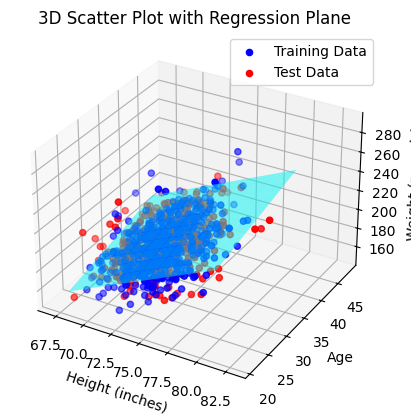

In [ ]:
# 3d scatter plot with regression plane

# Initialize a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for training data points
ax.scatter(height_train, age_train, weight_train, color='blue', label='Training Data')

# Scatter plot for test data points
ax.scatter(height_test, age_test, weight_test, color='red', label='Test Data')

# Create a meshgrid for the height and age ranges to plot the regression plane
height_range = np.linspace(min(height_train), max(height_train), 10)
age_range = np.linspace(min(age_train), max(age_train), 10)
H, A = np.meshgrid(height_range, age_range)

# Plot the regression plane
W = a + b * H + c * A
ax.plot_surface(H, A, W, color='cyan', alpha=0.5)

# Set axis labels
ax.set_xlabel("Height (inches)")
ax.set_ylabel("Age")
ax.set_zlabel("Weight (pounds)")

plt.legend() # Add legend
plt.title("3D Scatter Plot with Regression Plane") # Title for the plot
plt.show() # display the plot

## Predicted Vs. Actual Weights

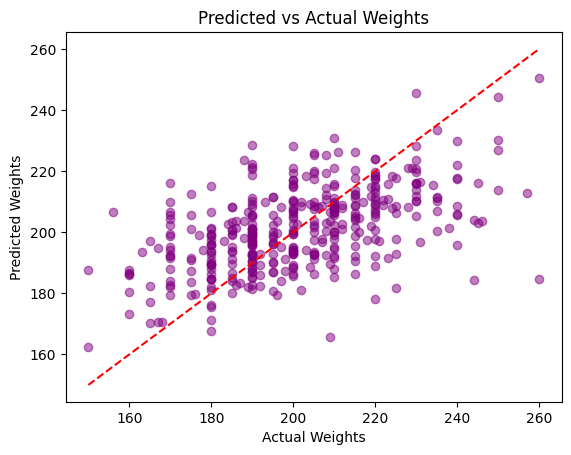

In [ ]:
# 2. Predicted vs Actual Weights
plt.figure()
plt.scatter(weight_test, weight_prediction, alpha=0.5, color='purple')  # weight_test is actual, predictions is predicted
plt.plot([min(weight_test), max(weight_test)], [min(weight_test), max(weight_test)], 'r--')  # Diagonal line
plt.xlabel("Actual Weights") # label x axis
plt.ylabel("Predicted Weights") # label y axis
plt.title("Predicted vs Actual Weights") # title for the plot
plt.show() # show the plot